<a href="https://colab.research.google.com/github/Vlasovasona/ML-home-works/blob/main/Seaborn_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2


## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_path = path + '/train.csv'
test_path = path + '/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [ ]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [ ]:
train = train[cols_subset]
test = test[cols_subset]

In [ ]:
train.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [ ]:
print(train.isna().sum())
print(test.isna().sum())

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64
tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64


Пропусков данных нет

In [ ]:
print(f"Количество дубликатов в train: {train.duplicated().sum()}")
print(f"Количество дубликатов в test: {test.duplicated().sum()}")

Количество дубликатов в train: 0
Количество дубликатов в test: 0


### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [ ]:
train_no_activity = train.drop(columns=['Activity'])
test_no_activity = test.drop(columns=['Activity'])

data = [
    {
        "mean": train_no_activity.mean(),
        "median": train_no_activity.median(),
        "std": train_no_activity.std(),
        "min": train_no_activity.min(),
        "max": train_no_activity.max(),
        "percentile_0,25": train_no_activity.quantile(0.25),
        "percentile_0.5": train_no_activity.quantile(0.5),
        "percentile_0.75": train_no_activity.quantile(0.75)
    },
    {
        "mean": test_no_activity.mean(),
        "median": test_no_activity.median(),
        "std": test_no_activity.std(),
        "min": test_no_activity.min(),
        "max": test_no_activity.max(),
        "percentile_0,25": test_no_activity.quantile(0.25),
        "percentile_0.5": test_no_activity.quantile(0.5),
        "percentile_0.75": test_no_activity.quantile(0.75)
    }

]

df_train = pd.DataFrame(data[0])
df_test = pd.DataFrame(data[1])

print("Основные статистики данных для train:")
print(df_train)

print("Основные статистики данных для test:")
print(df_test)


Основные статистики данных для train:
                                   mean     median       std       min  \
tBodyAccMag-mean()            -0.543884  -0.883371  0.477653 -1.000000   
tBodyGyroJerk-mad()-X         -0.727735  -0.950268  0.315832 -0.999889   
tGravityAcc-min()-X            0.678505   0.926693  0.508656 -1.000000   
tBodyAcc-max()-X              -0.468604  -0.881637  0.544547 -1.000000   
fBodyAcc-bandsEnergy()-1,8.2  -0.847963  -0.986582  0.233633 -1.000000   
angle(X,gravityMean)          -0.489547  -0.709417  0.511807 -1.000000   
angle(Y,gravityMean)           0.058593   0.182071  0.297480 -1.000000   
angle(Z,gravityMean)          -0.056515   0.003181  0.279122 -1.000000   
fBodyAcc-skewness()-X         -0.128562  -0.163271  0.403686 -0.931208   
subject                       17.413085  19.000000  8.975143  1.000000   

                                    max  percentile_0,25  percentile_0.5  \
tBodyAccMag-mean()             1.000000        -0.983282       -0.88337

**Наблюдения по полученным таблицам:**

1.   **Совпадение данных из тестовой и тренировочной выборок.** Данные test и train практически не отличаются, что позволяет нам судить о данных в test по train и наоборот.

2.   **Коэффициенты ассиметрии.** Максимальная величина ускорения тела (tGravityAcc-min()-X) по оси Х имеет достаточно сильное различие между медианой и средним значением, оно имеет левостороннюю ассиметрию, так как Me > mean. Также можно посмотреть на квартили этого распределния, чтобы увериться в том, что распределение сосредоточено правее. Похожая ситуация наблюдается у усредненной величины ускорения тела (имеет правостороннее распределение так как Me < mean) (tBodyAccMag-mean()), а следовательно As такого распределения меньше нуля.

3. **Стандартное отклонение и вариабельность признаков.** Признак fBodyAcc-bandsEnergy()-1,8.2 (энергия ускорения тела в интервале частоты) имеет наименьшее стандартное отклонение, что говорит о том, что по сравнению с другими этот признак имеет наименьший разброс вокруг выборочного среднего.

4. **Максимальное значение угла между осью Y и усредненной графитационной составляющей (angle(Y,gravityMean)).** В сравнении с другими признаками максимальное значение сильно ниже, всего **0.478157**. Что говорит о том, что по этой оси гравитационная составляющая не достигала своего максимума.



---




### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [ ]:
activity_count_train = train['Activity'].value_counts()
activity_count_test = test['Activity'].value_counts()

print(f"Кол-во наблюдений для train: {activity_count_train}")
print(f"Кол-во наблюдений для test: {activity_count_test}")

Кол-во наблюдений для train: Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
Кол-во наблюдений для test: Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [ ]:
difference_train = round(100-activity_count_train[-1]/(activity_count_train[0]/100))
difference_test = round(100-activity_count_test[-1]/(activity_count_test[0]/100))

print("данные train сбалансированы" if difference_train <= 30 else "данные train не сбалансированы")
print("данные test сбалансированы" if difference_test <= 30 else "данные test не сбалансированы")

данные train сбалансированы
данные test сбалансированы




---



### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [ ]:
new_train = pd.get_dummies(train, columns=['Activity'], drop_first=True)
new_test = pd.get_dummies(test, columns=['Activity'], drop_first=True)

correlations_train = new_train.corr()
correlations_test = new_test.corr()

In [ ]:
print("Таблица корреляции для train:")
correlations_train

Таблица корреляции для train:


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewne

In [ ]:
print("\n\nТаблица корреляции для test:")
correlations_test



Таблица корреляции для test:


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   
Activity_SITTING                       -0.401367              -0.395664   
Activity_STANDING                      -0.414812              -0.379256   
Activity_WALKING                        0.382256               0.522026   
Activity_WALKING_DOWNSTAIRS             0.533885               0.464393   
Activity_WALKING_UPSTAIRS               0.399410               0.255742   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   
Activity_SITTING                         0.196159         -0.396788   
Activity_STANDING                        0.244371         -0.408003   
Activity_WALKING                         0.227835          0.281951   
Activity_WALKING_DOWNSTAIRS              0.193024          0.638335   
Activity_WALKING_UPSTAIRS                0.163337          0.364582   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   
Activity_SITTING                                 -0.295023   
Activity_STANDING                                -0.323854   
Activity_WALKING                                  0.213190   
Activity_WALKING_DOWNSTAIRS                       0.270809   
Activity_WALKING_UPSTAIRS                         0.524637   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)                      1.000000             -0.668108   
angle(Y,gravityMean)                     -0.668108              1.000000   
angle(Z,gravityMean)                     -0.615114              0.425454   
fBodyAcc-skewne

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

**Наблюдения:**

1.   **Высокая корреляция между tBodyAccMag-mean() и tBodyAcc-max()-X**. Это неудивительно, ведь оба этих покахателя отвечают за ускорение тела. Максимальная величина ускорения тела по оси X и средняя величина ускорения тела тесно связаны (можно вспомнить еще про tBodyGyroJerk-mad()-X которая тоже имеет высокую корреляцию с tBodyAccMag-mean() и она также отвечает за ускорение).

2.   **Низкая корреляция между tGravityAcc-min()-X и angle(X,gravityMean).** Сообщает о том, что увеличение минимума гравитационной составляющей ускорения по оси X вызывает уменьшение угла между этой осью и вектором усредненной гравитационной составляющей (это объснимо тем, что когда предмет ориентирован вертикально, ось Х совпадает с с направлением гравитации, соответсвенно угол между ними стремится к нулю, а минимальное значение гравитационного ускорения в таком случае будет наибольшим).

3. Очевидно, **что углы между осями и вектором гравитационного ускорения будут иметь друг с другом сильную взаимосвязь**. Например можно посмотреть на корреляцию между angle(X,gravityMean) и angle(Y,gravityMean), которая равна -0.783848. Для примера: если угол между осью X и вектором гравитации увеличивается (человек наклонился), то угол между осью Y и вектором гравитации должен уменьшаться (так как оси X и Y перпендикулярны друг другу).

4. Заметим, что так как переменна target является категориальной, необходимо провести кодировку при помощи one-hot-encoding для того, чтобы соблюсти нормализованность данных.





---



## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

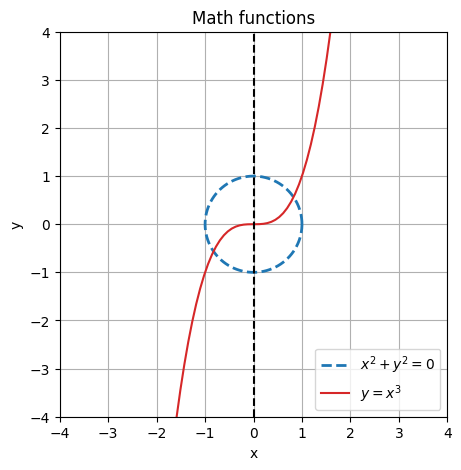

In [ ]:
theta = np.linspace(0, 2*np.pi, 200)
radius = 1
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

x_parabola = np.linspace(-2, 2)
y_parabola = x_parabola ** 3

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x_circle, y_circle, label=r'$x^2 + y^2 = 0$', linestyle='--', linewidth=2)

ax.plot(x_parabola, y_parabola, label=r'$y = x^3$', color='tab:red')

ax.axvline(x=0, linestyle='--', color='black', linewidth=1.5)

ax.grid(True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ax.set_title("Math functions")

ax.legend(loc='lower right')

plt.show()



---



### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

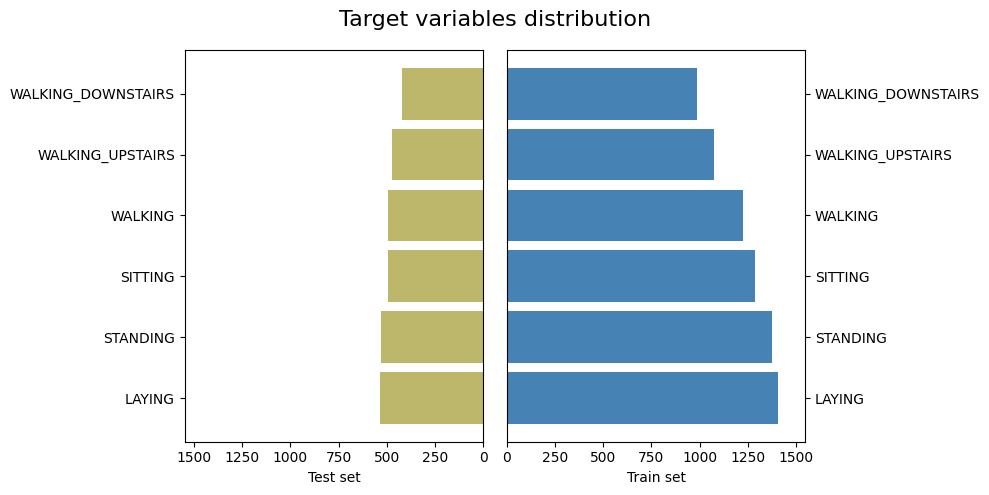

In [ ]:
comb_categories = pd.concat([activity_count_train , activity_count_test ], axis=1).fillna(0)
sorted_cat = comb_categories.sum(axis=1).sort_values(ascending=False).index

activity_count_train_sort = activity_count_train.reindex(sorted_cat).fillna(0)
activity_count_test_sort = activity_count_test.reindex(sorted_cat).fillna(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.barh(
    y = sorted_cat.values,
    width = activity_count_test_sort.values,
    height = 0.85,
    color='DarkKhaki',
)

ax2.barh(
    y = sorted_cat.values,
    width = activity_count_train_sort.values,
    height=0.85,
    color='SteelBlue',
)


ax1.set_yticklabels(sorted_cat)
ax1.set_xlabel('Test set')


ax2.yaxis.tick_right()
ax2.set_yticklabels(sorted_cat)
ax2.set_xlabel('Train set')

max_value = max(max(activity_count_train_sort), max(activity_count_test_sort))
ax1.set_xlim(0, max_value * 1.1)
ax2.set_xlim(0, max_value * 1.1)
ax1.invert_xaxis()

fig.suptitle('Target variables distribution', fontsize=16)

plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)



---



### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика



---

**Не рассматриваем subject и activity, потому что, как уже было указано ранее, категориальные признаки (и закодированные в том числе) не представляют интереса в корреляционных таблицах/графиках.**

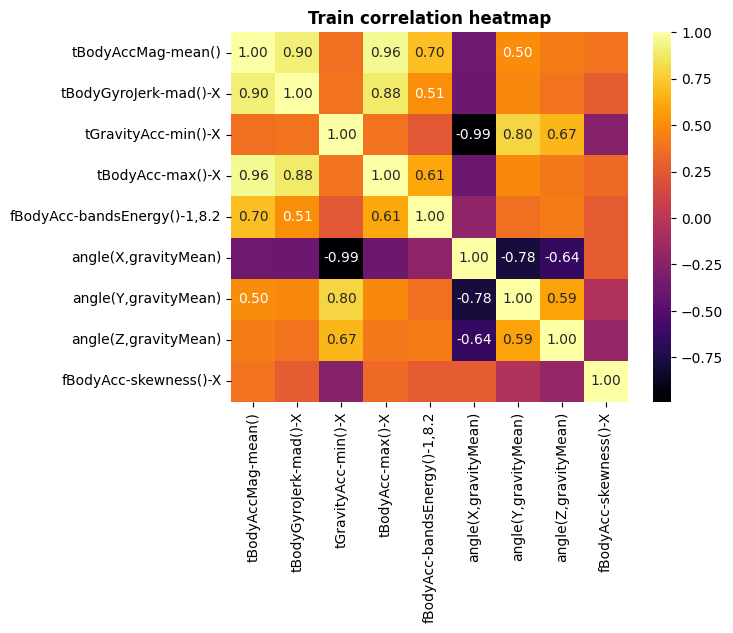

In [ ]:
ax = sns.heatmap(train.drop(columns=['subject', 'Activity']).corr(),
                 cmap="inferno", annot=True, fmt="0.2f")
ax.set_title('Train correlation heatmap', weight='bold')
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5 and float(t.get_text()) != -1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

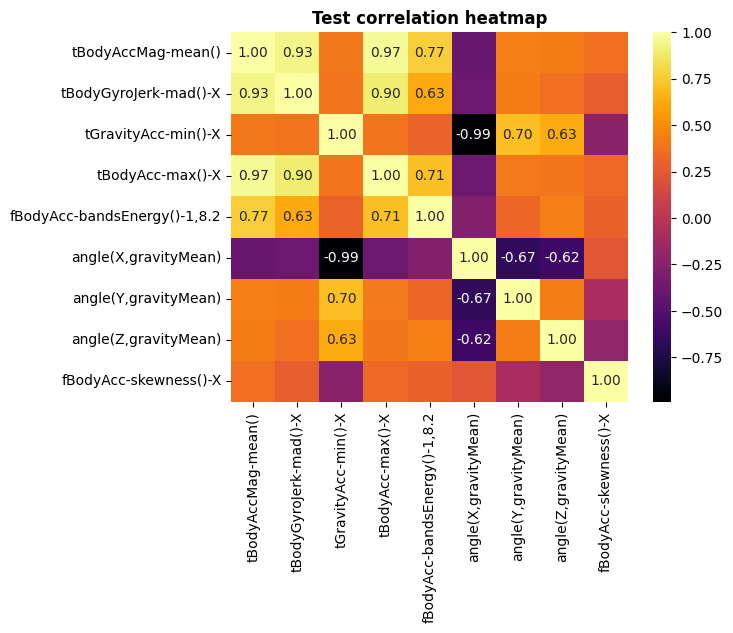

In [ ]:
ax = sns.heatmap(test.drop(columns=['Activity', 'subject']).corr(),
                 cmap="inferno", annot=True, fmt="0.2f")
ax.set_title('Test correlation heatmap', weight='bold')
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5 and float(t.get_text()) != -1:
        t.set_text(t.get_text())
    else:
        t.set_text("")



---



### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

**Анализ pairplot:**



1.   Самым полезным оказались графики плотности вероятности, потому что, глядя на них, можно оценить количество **выбросов**. Например, у tGravityAcc-min()-X  много выбросов (это видно по отлельно стоящим от основного "пика" распределения стобикам).
2.   Также по графикам плотности легко определить **коэффициент ассиметрии**, не заглядывая в значение медианы и выборочного среднего (как мы делали это в начале), данные предстают более наглядно (можно увидеть, например,что показатели, связанные с углами между векторами имеют меньший **эксцесс** распределения, а, соответственно, и более плавные вершины и более легкие хвосты в сравнении с гравитационными показателями и показателями, связанными с ускорением и рывком тела).

3. Интересно, что **графики angle-показателей имеют совершенно разную симметрию**: Х - правостороннее распр., Y - левостороннее, а Z вообще почти имитирет нормальное распределение. Они как бы "дополняют" друг друга (например, если человек идет в гору, то его координаты по Z растут гораздо сильнее, чем по другим осям).

4. **Графики рассеяния** не очень удобны для анализа. Но тут быстрее можно проследить линейные зависимости между признаками: Angle(X) и tGravityAcc-min()-X имеют сильную линейную зависимость (отрицательную), что уже было замечено ранее.





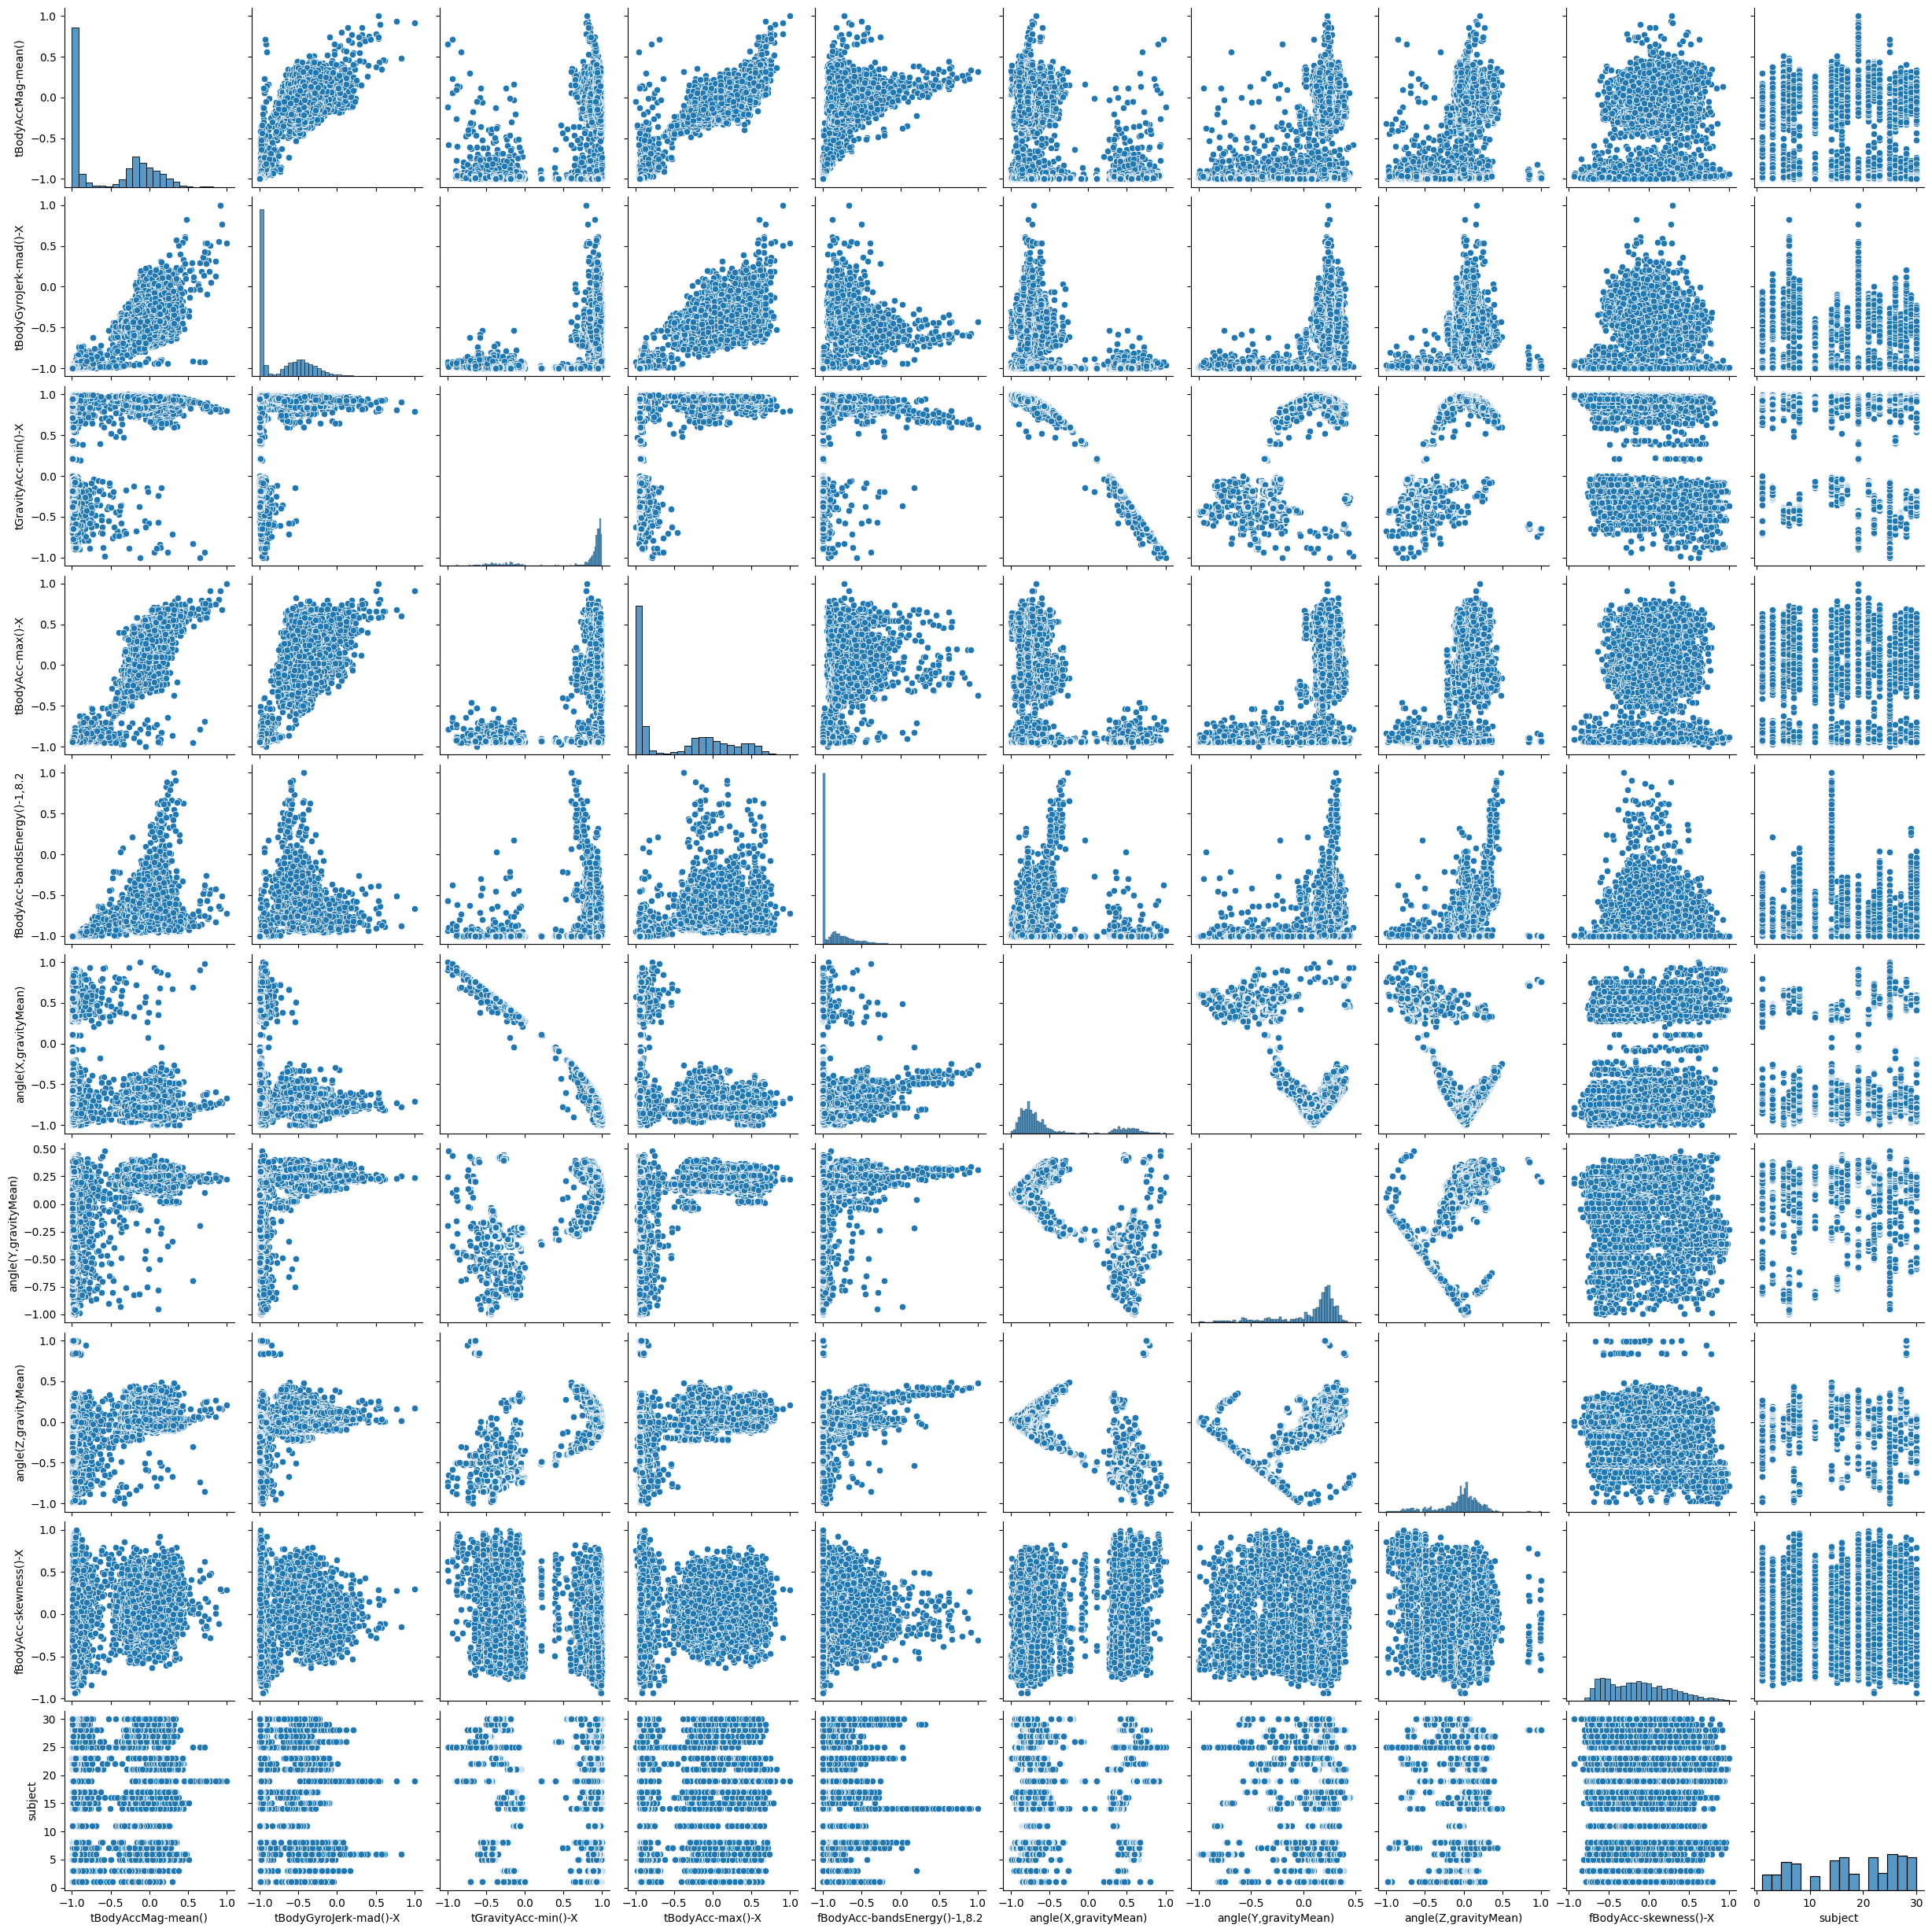

In [ ]:
sns.pairplot(train);



---



### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

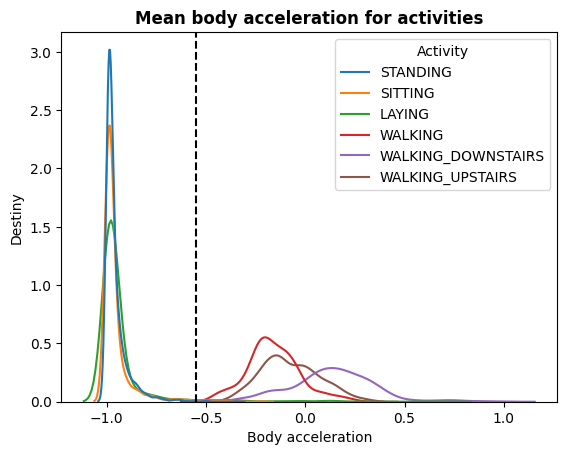

In [ ]:
plt.legend(title='Activities')

fig = sns.kdeplot(data=train, x="tBodyAccMag-mean()", hue="Activity")


plt.title('Mean body acceleration for activities', weight='bold')
plt.xlabel('Body acceleration')
plt.ylabel('Destiny')
plt.axvline(x=-0.55, color='black', linestyle='--')
plt.show()

In [ ]:
# подсчет доли правильных ответов
dynamic_actions = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
static_actions = ['STANDING', 'SITTING', 'LAYING']

dynamic_df = train[train['Activity'].isin(dynamic_actions)]
static_df = train[train['Activity'].isin(static_actions)]

percentage_dynamic = (dynamic_df[dynamic_df['tBodyAccMag-mean()'] > -0.55].shape[0]) / dynamic_df.shape[0]
percentage_static = (static_df[static_df['tBodyAccMag-mean()'] <= -0.55].shape[0]) / static_df.shape[0]

print(f"Доля правильных ответов для статических активностей: {percentage_static*100:.2f}%")
print(f"Доля правильных ответов для динамических активностей: {percentage_dynamic*100:.2f}%")

Доля правильных ответов для статических активностей: 98.35%
Доля правильных ответов для динамических активностей: 100.00%


**Анализ:**

tBodyAccMag-mean() отвечает за усредненную величину ускорения тела, соответственно, для статических активностей она будет минимальной (что видно на графике), для динамических она будет больше.

Линия-разделитель хорошо отсекла нужные виды активностей друг от друга, визуально выделяя их в две подгруппы.



---



### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

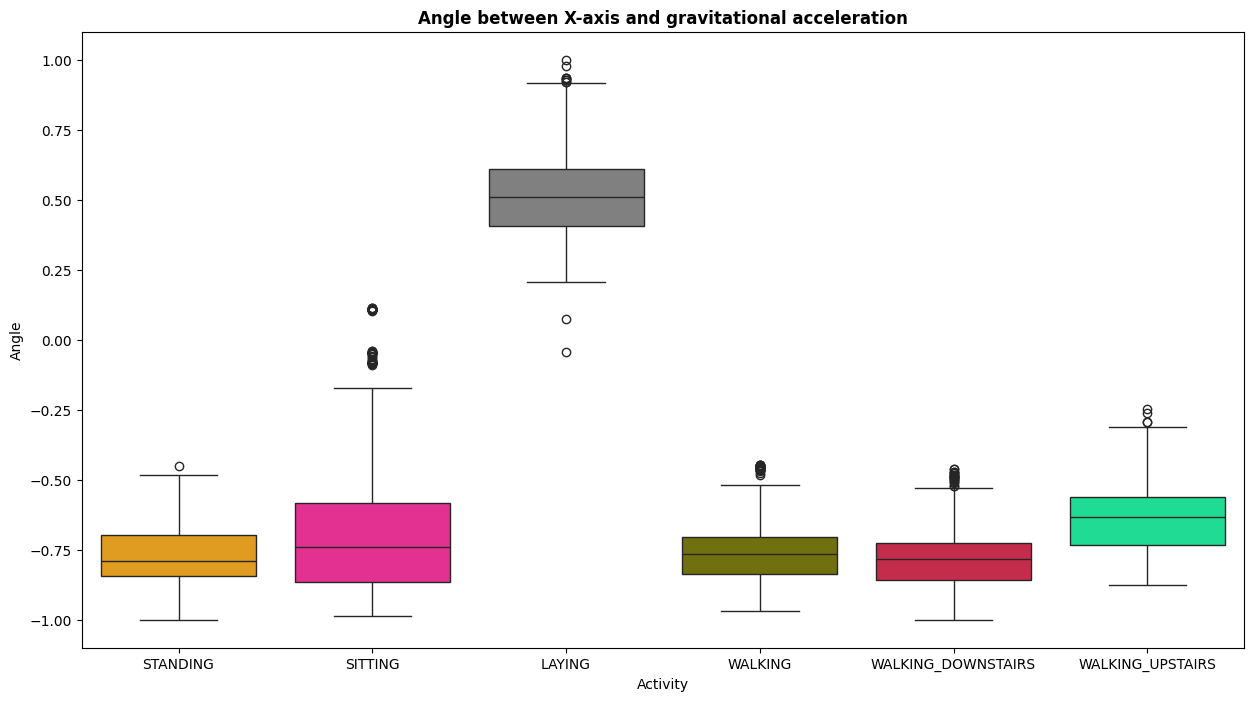

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Activity', y='angle(X,gravityMean)', data=train,
            palette=["Orange", "DeepPink", "Gray", "Olive", "Crimson", "MediumSpringGreen"])
plt.title("Angle between X-axis and gravitational acceleration", weight='bold')
plt.xlabel('Activity')
plt.ylabel('Angle')
plt.show()

In [ ]:
train.loc[train['Activity'] == 'SITTING', 'angle(X,gravityMean)'].max()

0.11423038

In [ ]:
train.loc[train['Activity'] == 'WALKING_UPSTAIRS', 'angle(X,gravityMean)'].max()

-0.24687199

**Анализ:**

Сильно выделяется группа "Laying" за счет того, что в положении лежа тело приниммает особенные координаты в пространстве, отличные от других перечисленных видов активностей (все они совершаются стоя, в то время как лежим мы в горизонтальном положении).

Я могу допустить что при активности "Sitting" много выбросов, так как сидеть тоже можно в разных положениях, не всегда идеально вертикальных (если так вообще можно выразиться), ну и аналогично могу сказать про выбросы в "Laying".

Остальные категории активноствей особо ничем не отличились.



---



### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

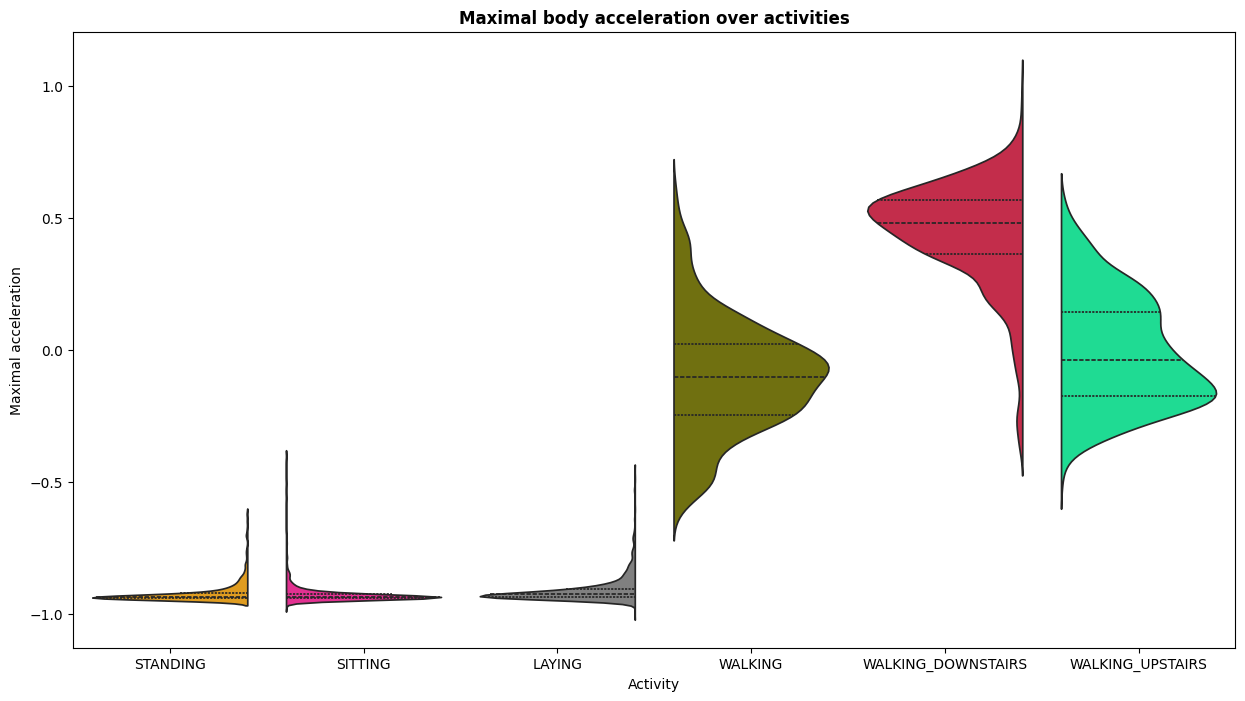

In [ ]:
plt.figure(figsize=(15, 8))
sns.violinplot(x = 'Activity', y='tBodyAcc-max()-X', data=train,
            palette=["Orange", "DeepPink", "Gray", "Olive", "Crimson", "MediumSpringGreen"],
               split=True, inner="quart")
plt.title("Maximal body acceleration over activities", weight='bold')
plt.xlabel('Activity')
plt.ylabel('Maximal acceleration')
plt.show()

In [ ]:
train.loc[train['Activity'] == 'WALKING_UPSTAIRS', 'tBodyAcc-max()-X'].min()

-0.50113483

In [ ]:
train.loc[train['Activity'] == 'WALKING_DOWNSTAIRS', 'tBodyAcc-max()-X'].quantile(0.25)

0.36086475

Ананлиз:

Статические виды деятельности, конечно, сильно отличаются от динамических, но среди динамических наиболее выделяющимся является "Walking_downstairs". При спуске с лестницы человеческое тело испытывает значительное ускорение из-за силы тяжести. Это приводит к возникновению значительных колебаний ускорения тела



---



### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

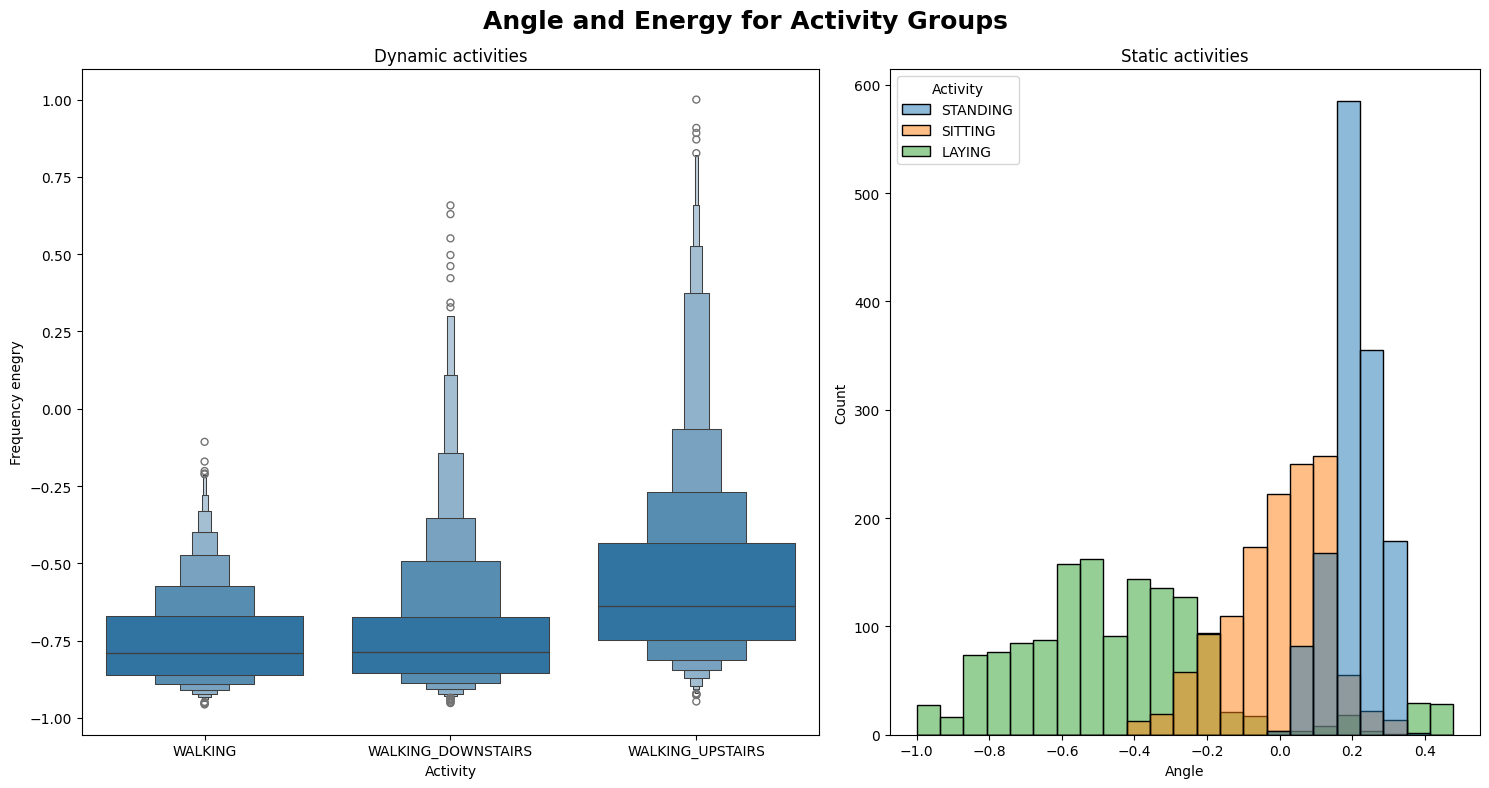

In [ ]:
static_actions = ['STANDING', 'SITTING', 'LAYING']
dynamic_actions = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

dynamic_df = train[train['Activity'].isin(dynamic_actions)]
static_df = train[train['Activity'].isin(static_actions)]
plt.figure(figsize=(15, 8))

# Создание subplots с разным размером
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[5, 4])

# Построение boxenplot для динамических активностей
plt.subplot(gs[0])
sns.boxenplot(x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', data=dynamic_df)
plt.title('Dynamic activities')
plt.xlabel('Activity')
plt.ylabel('Frequency enegry')

# Построение histplot для статической активности
plt.subplot(gs[1])
sns.histplot(x='angle(Y,gravityMean)', hue='Activity', data=static_df,
             stat='count')
plt.title('Static activities')
plt.xlabel('Angle')
plt.ylabel('Count')

plt.suptitle('Angle and Energy for Activity Groups', fontsize=18, weight='bold')

# Показ графика
plt.tight_layout()
plt.show()

In [ ]:
train.loc[train['Activity'] == 'WALKING', 'fBodyAcc-bandsEnergy()-1,8.2'].max()

-0.10700866

**Анализ:**

1. На первом графике выделяется "Walking_upstairs", энергия ускорения тела в интервалах частоты при обычной ходьбе примерно на уровне спуска с лестницы, при подъеме по летнице мы двигаемся рывками, не так плавно как при остальных активностях, что увеличивает fBodyAcc-bandsEnergy()-1,8.2.

2. На втором графике выделяется категория "Standing". Из-за того, что стоим мы всегда плюс-минус в одном положении (сидеть и лежать можно как угодно, соответственно и угол может меняться в зависимости от положения тела), распределение сосредоточено локально в правой части графика, а не растянуто как другие активности, плюс оно более островершинное.


---



### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

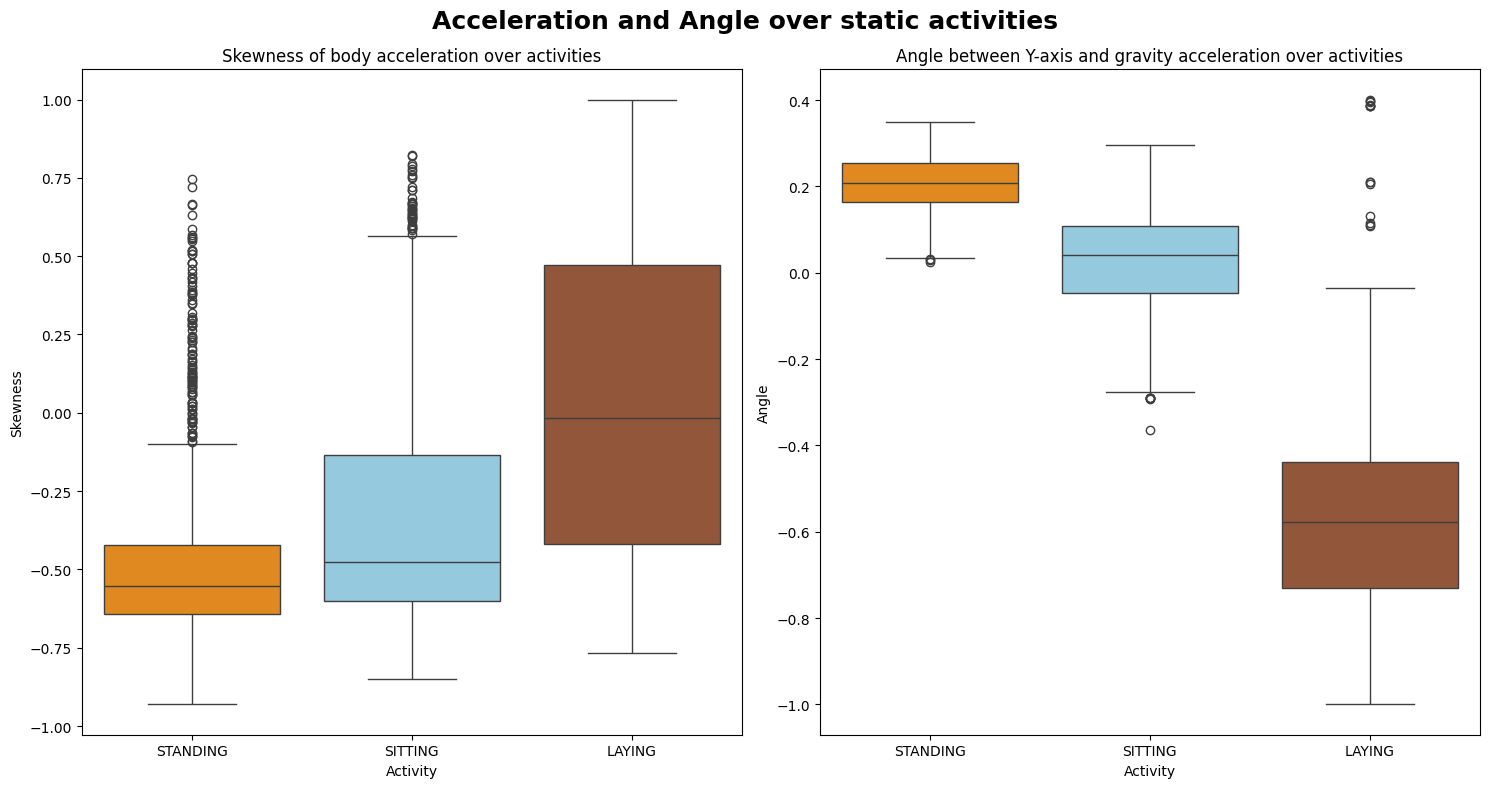

In [ ]:
static_actions = ['STANDING', 'SITTING', 'LAYING']
static_df = train[train['Activity'].isin(static_actions)]
plt.figure(figsize=(15, 8))

# Создание subplots с разным размером
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

plt.subplot(gs[0])
sns.boxplot(x='Activity', y='fBodyAcc-skewness()-X', data=static_df,
            palette=["DarkOrange", "SkyBlue", "Sienna"])
plt.title('Skewness of body acceleration over activities')
plt.xlabel('Activity')
plt.ylabel('Skewness')

# Второй график:
plt.subplot(gs[1])
filtered_static_df = static_df.query("`fBodyAcc-skewness()-X` < -0.376")
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=filtered_static_df,
            palette=["DarkOrange", "SkyBlue", "Sienna"])
plt.title('Angle between Y-axis and gravity acceleration over activities')
plt.xlabel('Activity')
plt.ylabel('Angle')

# Показ графика
plt.suptitle('Acceleration and Angle over static activities',
             fontsize=18,
             weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
train.loc[train['Activity'] == 'SITTING', 'fBodyAcc-skewness()-X'].max()

0.82262647

In [ ]:
train[
    (train['Activity'] == 'SITTING') &
    (train['fBodyAcc-skewness()-X'] < -0.376)
]['angle(Y,gravityMean)'].quantile(0.25)

-0.047889419

In [ ]:
train[
    (train['Activity'] == 'SITTING') &
    (train['fBodyAcc-skewness()-X'] < -0.376)
]['angle(Y,gravityMean)'].quantile(0.75)

0.10928072

**Анализ:**

У SITTING более ассиметричное распределение (это видно по разнице в расстоянии между медианой и первым квартилем и медианой и вторым квартилем). А с помощью второго графика можно выделить приблизительный диапазон значений этой категории (так как Sitting можно воспринимать каак промежуточную категорию между LYING и STANDING, то значения этой категории варьируются от -0.3 до 0.3, не сильный плюс и не сильный минус в то время, как STANDING принимает строго положительные значения, а LAYING строго отрицательные).



---




Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

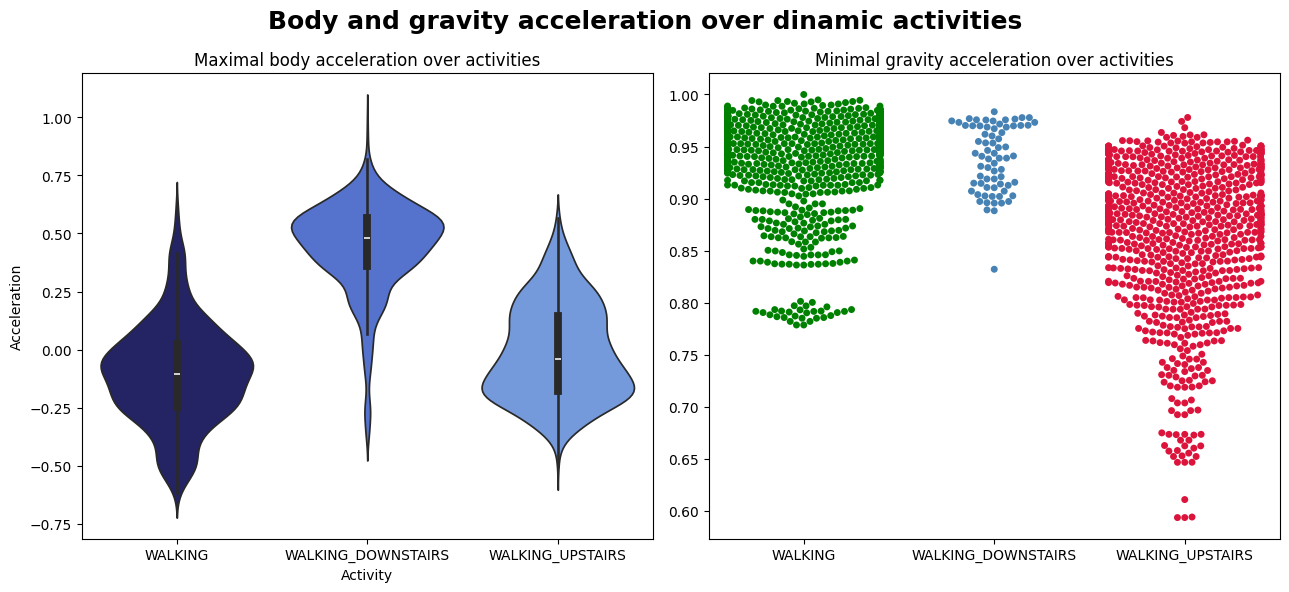

In [ ]:
dynamic_actions = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

dynamic_df = train[train['Activity'].isin(dynamic_actions)]
plt.figure(figsize=(13, 6))

# Создание subplots с разным размером
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

# Построение violinplot для динамических активностей
plt.subplot(gs[0])
sns.violinplot(x = 'Activity', y='tBodyAcc-max()-X', data=dynamic_df,
            palette=["MidnightBlue", "RoyalBlue", "CornflowerBlue"])
plt.title("Maximal body acceleration over activities")
plt.xlabel('Activity')
plt.ylabel('Acceleration')

# выбор порога
filtered_dynamic_df = dynamic_df[dynamic_df["tBodyAcc-max()-X"] < 0.157]

# Построение swarmplot для статической активности
plt.subplot(gs[1])
# filtered_for_plot = filtered_dynamic_df.query("`tGravityAcc-min()-X` <= @transformed_value")
sns.swarmplot(data=filtered_dynamic_df, y='tGravityAcc-min()-X', x='Activity',
              palette=["Green", "SteelBlue", "Crimson"])

plt.title("Minimal gravity acceleration over activities")
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('')

plt.suptitle('Body and gravity acceleration over dinamic activities',
             fontsize=18,
             weight='bold')

# Показ графика
plt.tight_layout()
plt.show()

In [ ]:
train[(train['Activity'] == 'WALKING_DOWNSTAIRS')]['tBodyAcc-max()-X'].quantile(0.25)

0.36086475

In [ ]:
train[
    (train['Activity'] == 'WALKING') &
    (train['tBodyAcc-max()-X'] < 0.157)
]['tGravityAcc-min()-X'].min()

0.77855856

**Анализ:**

Мы отобрали наблюдения с маленькой величиной ускорения тела по X и вывели соответствующие им наблюдения по минимумам гравитационных составляющих ускорения по Х. Немного выделилась категория "Walking", так как при обычной ходьбе гравитационное ускорение менимально по сравнению с подъемом по лестнице, хотя ускорение примерно одинаковое в том и другом случае.

Но, на самом деле, труднее всего будет угадать категорию между обчной ходьбой и подъемом по лестнице, так как разеультаты по ним едва различимы.



---



### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
pip install plotly

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 4min 32s, sys: 331 ms, total: 4min 32s
Wall time: 4min 41s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
import plotly.express as px

fig = px.scatter(df_2_comp, x='x', y='y',
                 color='Activity',
                 title='2D Separated Activities')
fig.show()

**Анализ:**

График достаточно четко разделил виды активностей по кластерам, которые можно друг от друга отделить линиями.

Главной задачей было уменьшение размерности данных для визуального отделения категорий активностей. То есть мы проверяем можно ли проследить четкие различия между группами активностей и, следовательно, разделить их.


---



Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
fig = px.scatter_3d(df_3_comp, x='x', y='y', z='z',
                    color='Activity',
                    title='3D Separated Activities')

fig.show()

Получилось супер. Структура у точек есть и действительно можно их отделить друг от друга. (статические отделяются лучше, но и динамические при желании можно отделить, просто погрешность будет больше)



---



### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [ ]:
def predict(df: pd.DataFrame):
    predictions = []
    for index, row in df.iterrows():
        if row["tBodyAccMag-mean()"] <= -0.55:
            # блок static
            if row['angle(X,gravityMean)'] > 0.12 or row['fBodyAcc-skewness()-X'] > 0.82 or ((row['fBodyAcc-skewness()-X'] < -0.376) and (row['angle(Y,gravityMean)'] <= -0.36)):
              predictions.append('LAYING')
            elif row['fBodyAcc-skewness()-X'] < -0.376 and row['angle(Y,gravityMean)'] > 0.15:
              predictions.append('STANDING')
            elif ((row['angle(X,gravityMean)'] > -0.69775) and (row['angle(X,gravityMean)'] < -0.69775)) or (row['fBodyAcc-skewness()-X'] < -0.376) or ((row['angle(Y,gravityMean)'] > -0.0479) and (row['angle(Y,gravityMean)'] < 0.15 )):
              predictions.append('SITTING')
            else:
              predictions.append('SITTING')

        else:
          # блок dynamic
            if row['tBodyAcc-max()-X'] >= 0.25:
                predictions.append('WALKING_DOWNSTAIRS')
                continue
            if row['tBodyAcc-max()-X'] < -0.501 or (row['tBodyAcc-max()-X'] < 0.157 and row['tGravityAcc-min()-X'] >= 0.9834211):
                predictions.append('WALKING')
                continue
            if (row['tBodyAcc-max()-X'] < 0.157 and row['tGravityAcc-min()-X'] < 0.9) or (row['angle(X,gravityMean)'] > -0.44626) or (row['fBodyAcc-bandsEnergy()-1,8.2'] > -0.4526):
                predictions.append('WALKING_UPSTAIRS')
            else:
                predictions.append('WALKING')

    return predictions

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)

print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8106637649619152
Accuracy on test set => 0.7675602307431286


__Место для мема и/или фидбэка__

> Шпаргалка капец как помогла, спасибо, без нее не сделала бы